In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import MinMaxScaler

In [58]:
dataset = pd.read_csv("train.csv")
dataset.fillna(dataset.mean(axis=0), inplace= True)
dataset.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.540471,-0.106792,0.557373,0.400259,8.0,0.430810,75751,0.2254,11.0,4.738201,-0.570869,0.49,5.0,1.842984,27.053679,1.0,-0.545194,0.800476,-0.925463,2.0,0.604975,-0.489492,0.803361,-1.202756,-0.334039,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,-8.270447e-08,-0.000156,...,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.540471,-0.106792,0.557373,0.400259,3.0,0.388896,17369,0.0166,13.0,4.738201,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-9.027256e-06,-0.000248,...,-0.000104,0.000555,0.000259,2.559339e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,3.540471,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.604975,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-9.295448e-04,-0.000543,...,-0.000003,-0.000102,-0.000292,5.032658e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136847e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,3.540471,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.590217,1.801865,1.0,-1.131213,1.565036,-1.205168,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.334039,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,0.000340,-0.000639,0.000420,1.449000e-04,-0.000130,...,0.000120,-0.000119,0.000285,-1.020028e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739541e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.000000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,0.001226,0.001213,-2.428

In [59]:
ret_2 = dataset['Ret_2']
ret_2.head()

0    0.000003
1   -0.000487
2   -0.000782
3    0.000277
4   -0.001232
Name: Ret_2, dtype: float64

In [60]:
"""def modify(array, ret_n):
  #modify the values of returns
  for i in range (array.size):
    array[i] = array[i] + ret_n[i]
    #print (array[i])"""
   

'def modify(array, ret_n):\n  #modify the values of returns\n  for i in range (array.size):\n    array[i] = array[i] + ret_n[i]\n    #print (array[i])'

In [61]:
"""for i in range (118):
  dataset[returns[i]].fillna(dataset[returns[i]].mean(axis=0), inplace= True)
  dataset[index[i]].fillna(dataset[index[i]].mean(axis=0), inplace= True)
  dataset = modify(dataset[returns[i]], dataset[index[i]])"""

'for i in range (118):\n  dataset[returns[i]].fillna(dataset[returns[i]].mean(axis=0), inplace= True)\n  dataset[index[i]].fillna(dataset[index[i]].mean(axis=0), inplace= True)\n  dataset = modify(dataset[returns[i]], dataset[index[i]])'

In [62]:
cols = dataset.columns
index = cols[28:206]
index

Index(['Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9',
       'Ret_10', 'Ret_11',
       ...
       'Ret_170', 'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174', 'Ret_175',
       'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179'],
      dtype='object', length=178)

In [63]:

returns = cols[29:207]

returns

Index(['Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9', 'Ret_10',
       'Ret_11', 'Ret_12',
       ...
       'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174', 'Ret_175', 'Ret_176',
       'Ret_177', 'Ret_178', 'Ret_179', 'Ret_180'],
      dtype='object', length=178)

In [0]:
for i in range(118):
  dataset[returns[i]] = dataset[returns[i]] +dataset[index[i]]

In [65]:
dataset.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.540471,-0.106792,0.557373,0.400259,8.0,0.430810,75751,0.2254,11.0,4.738201,-0.570869,0.49,5.0,1.842984,27.053679,1.0,-0.545194,0.800476,-0.925463,2.0,0.604975,-0.489492,0.803361,-1.202756,-0.334039,0.055275,-0.010770,0.000003,-0.000731,-0.001469,-0.001475,-0.001052,-0.000615,-0.000691,-0.000046,-0.000052,-0.000046,-0.000046,-0.000202,...,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.540471,-0.106792,0.557373,0.400259,3.0,0.388896,17369,0.0166,13.0,4.738201,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,-0.000013,-0.000011,-0.000013,-0.000536,-0.000791,-0.000799,-0.000751,-0.001063,-0.001805,-0.001814,-0.002062,...,-0.000104,0.000555,0.000259,2.559339e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,3.540471,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.604975,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,-0.000782,-0.001184,-0.000377,0.000023,0.000679,-0.000498,0.000700,0.001310,0.000279,0.000926,-0.000003,-0.000547,...,-0.000003,-0.000102,-0.000292,5.032658e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136847e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,3.540471,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.590217,1.801865,1.0,-1.131213,1.565036,-1.205168,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.334039,0.000984,0.014106,0.000277,0.000189,-0.000010,-0.000311,0.000400,-0.000031,-0.000175,0.000165,-0.000474,-0.000054,0.000091,-0.000040,...,0.000120,-0.000119,0.000285,-1.020028e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739541e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.000000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,-0.001232,-0.001230,-0.002435,-0.002456,-0.002451,-0.001828,-0.003671,-0.003666,-0.002440,-0.001227,-0.003655

In [66]:
values = dataset.values
"""X = dataset.iloc[:,0:27]
Y = dataset.iloc[:,85]"""

'X = dataset.iloc[:,0:27]\nY = dataset.iloc[:,85]'

In [0]:
#df= pd.DataFrame({"Ret_2"})

In [0]:
def supervised(data, n=1, m=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
  

	for i in range(n, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    

	for i in range(0, m):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

      
	agg = pd.concat(cols, axis=1)
	agg.columns = names 
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
norm = MinMaxScaler(feature_range=(0, 1))
scaleddata = norm.fit_transform(values)
newdata = supervised(scaleddata, 1, 1)
newdata= newdata.values

In [0]:
train_X = newdata[:,:27]
train_y = newdata[:,85]

In [0]:
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [71]:
test_data = pd.read_csv('test_2.csv')
test_data.fillna(dataset.mean(axis = 0), inplace = True)
test_X = values[:,0:27]
test_y = values[:,85]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(23192, 1, 27) (23192,) (23193, 1, 27) (23193,)


In [72]:
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [73]:
history = model.fit(train_X, train_y, epochs=500, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Instructions for updating:
Use tf.cast instead.
Train on 23192 samples, validate on 23193 samples
Epoch 1/500
 - 2s - loss: 0.0387 - val_loss: 0.5170
Epoch 2/500
 - 1s - loss: 0.0186 - val_loss: 0.5205
Epoch 3/500
 - 1s - loss: 0.0182 - val_loss: 0.4869
Epoch 4/500
 - 1s - loss: 0.0178 - val_loss: 0.4448
Epoch 5/500
 - 1s - loss: 0.0177 - val_loss: 0.4141
Epoch 6/500
 - 1s - loss: 0.0175 - val_loss: 0.3881
Epoch 7/500
 - 1s - loss: 0.0172 - val_loss: 0.3752
Epoch 8/500
 - 1s - loss: 0.0171 - val_loss: 0.3552
Epoch 9/500
 - 1s - loss: 0.0170 - val_loss: 0.3541
Epoch 10/500
 - 1s - loss: 0.0169 - val_loss: 0.3592
Epoch 11/500
 - 1s - loss: 0.0169 - val_loss: 0.3554
Epoch 12/500
 - 1s - loss: 0.0169 - val_loss: 0.3585
Epoch 13/500
 - 1s - loss: 0.0169 - val_loss: 0.3498
Epoch 14/500
 - 1s - loss: 0.0169 - val_loss: 0.3502
Epoch 15/500
 - 1s - loss: 0.0169 - val_loss: 0.3492
Epoch 16/500
 - 1s - loss: 0.0170 - val_loss: 0.3458
Epoch 17/500
 - 1s - loss: 0.0170 - val_loss: 0.3470
Epoch 18/5

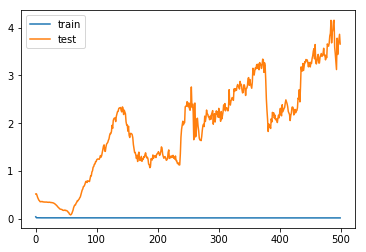

In [74]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()